IMAGE CLASSIFICATION

In [1]:
#from google.colab import drive

In [2]:
#drive.mount('/content/drive')

In [3]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Images/train'
valid_path = '/content/drive/MyDrive/Images/test'

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [6]:

for layer in inception.layers:
    layer.trainable = False

In [7]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Images/train/*')

In [8]:
test_folder=glob('/content/drive/MyDrive/Images/test/*')

In [9]:
folders

['/content/drive/MyDrive/Images/train/trousers',
 '/content/drive/MyDrive/Images/train/sarees',
 '/content/drive/MyDrive/Images/train/jeans']

In [10]:
test_folder

['/content/drive/MyDrive/Images/test/jeans',
 '/content/drive/MyDrive/Images/test/trousers',
 '/content/drive/MyDrive/Images/test/sarees']

In [11]:
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
# cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)

In [15]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Images/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2403 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Images/test',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 600 images belonging to 3 classes.


In [17]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
151/151 [==============================] - 368s 2s/step - loss: 2.0344 - accuracy: 0.8639 - val_loss: 1.1045 - val_accuracy: 0.9483
Epoch 2/10
151/151 [==============================] - 37s 246ms/step - loss: 1.6157 - accuracy: 0.9293 - val_loss: 2.4388 - val_accuracy: 0.9500
Epoch 3/10
151/151 [==============================] - 37s 247ms/step - loss: 2.1868 - accuracy: 0.9251 - val_loss: 1.1780 - val_accuracy: 0.9517
Epoch 4/10
151/151 [==============================] - 37s 245ms/step - loss: 1.9277 - accuracy: 0.9388 - val_loss: 1.9829 - val_accuracy: 0.9517
Epoch 5/10
151/151 [==============================] - 37s 245ms/step - loss: 1.8058 - accuracy: 0.9530 - val_loss: 1.1666 - val_accuracy: 0.9583
Epoch 6/10
151/151 [==============================] - 37s 246ms/step - loss: 1.7657 - accuracy: 0.9501 - val_loss: 2.7384 - val_accuracy: 0.9017
Epoch 7/10
151/151 [==============================] - 37s 245ms/step - loss: 2.5493 - accuracy: 0.9380 - val_loss: 2.2858 - val_accu

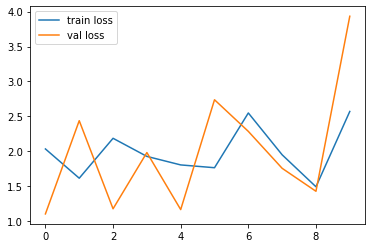

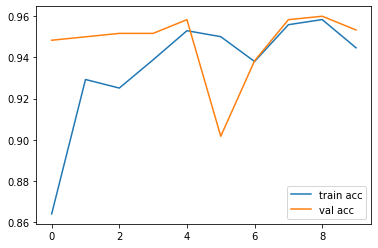

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

RESNET

In [19]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [20]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [21]:
for layer in resnet.layers:
    layer.trainable = False

In [22]:
folders = glob('/content/drive/MyDrive/Images/train/*')

In [23]:
folders

['/content/drive/MyDrive/Images/train/trousers',
 '/content/drive/MyDrive/Images/train/sarees',
 '/content/drive/MyDrive/Images/train/jeans']

In [24]:
x_res = Flatten()(resnet.output)

In [25]:
prediction_res = Dense(len(folders), activation='softmax')(x_res)

# create a model object
model_resnet = Model(inputs=resnet.input, outputs=prediction_res)

In [26]:
# view the structure of the model
model_resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [27]:
model_resnet.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [28]:
train_data_res = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_data_res = ImageDataGenerator(rescale = 1/255)

In [29]:
training_res = train_data_res.flow_from_directory('/content/drive/MyDrive/Images/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_res = test_data_res.flow_from_directory('/content/drive/MyDrive/Images/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2403 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [30]:
# fit the model
res = model_resnet.fit_generator(
  training_res,
  validation_data=test_res,
  epochs=50,
  steps_per_epoch=len(training_res),
  validation_steps=len(test_res)
)

Epoch 1/50
76/76 [==============================] - 41s 492ms/step - loss: 2.4803 - accuracy: 0.5685 - val_loss: 0.9329 - val_accuracy: 0.6167
Epoch 2/50
76/76 [==============================] - 36s 470ms/step - loss: 0.7647 - accuracy: 0.7004 - val_loss: 0.3740 - val_accuracy: 0.8600
Epoch 3/50
76/76 [==============================] - 36s 469ms/step - loss: 0.4659 - accuracy: 0.7919 - val_loss: 0.3517 - val_accuracy: 0.8400
Epoch 4/50
76/76 [==============================] - 36s 471ms/step - loss: 0.4252 - accuracy: 0.8202 - val_loss: 0.5092 - val_accuracy: 0.8533
Epoch 5/50
76/76 [==============================] - 36s 471ms/step - loss: 0.3644 - accuracy: 0.8348 - val_loss: 0.2813 - val_accuracy: 0.8683
Epoch 6/50
76/76 [==============================] - 36s 473ms/step - loss: 0.3842 - accuracy: 0.8394 - val_loss: 0.3875 - val_accuracy: 0.8100
Epoch 7/50
76/76 [==============================] - 36s 478ms/step - loss: 0.4687 - accuracy: 0.8277 - val_loss: 0.3857 - val_accuracy: 0.8717

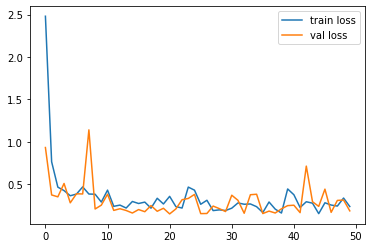

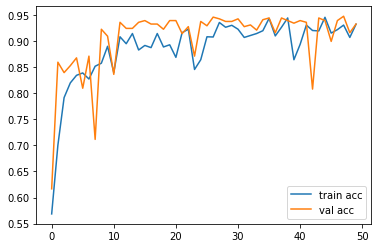

<Figure size 432x288 with 0 Axes>

In [31]:
# plot the loss
plt.plot(res.history['loss'], label='train loss')
plt.plot(res.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(res.history['accuracy'], label='train acc')
plt.plot(res.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

VGG16

In [32]:
# add preprocessing layer to the front of VGG image size we have given for first model,same size is given here
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [33]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [34]:
 # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Images/train/*')

In [35]:
 #our layers
x_vgg = Flatten()(vgg.output)
prediction_vgg = Dense(len(folders), activation='softmax')(x_vgg)

In [36]:
# creating a model object
model_vg = Model(inputs=vgg.input, outputs=prediction_vgg)


In [37]:
# view the structure of the model
model_vg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [38]:
# tell the model what cost and optimization method to use
model_vg.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [41]:
train_data_vg = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_data_vg = ImageDataGenerator(rescale = 1/255)

In [42]:
training_vg = train_data_vg.flow_from_directory('/content/drive/MyDrive/Images/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_vg = test_data_vg.flow_from_directory('/content/drive/MyDrive/Images/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2403 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [44]:
# fit the model
vg = model_vg.fit_generator(
  training_vg,
  validation_data=test_vg,
  epochs=50,
  steps_per_epoch=len(training_vg),
  validation_steps=len(test_vg)
)

Epoch 1/50
76/76 [==============================] - 43s 531ms/step - loss: 0.3728 - accuracy: 0.8477 - val_loss: 0.3622 - val_accuracy: 0.9467
Epoch 2/50
76/76 [==============================] - 37s 491ms/step - loss: 0.2240 - accuracy: 0.9367 - val_loss: 0.1542 - val_accuracy: 0.9600
Epoch 3/50
76/76 [==============================] - 37s 489ms/step - loss: 0.1520 - accuracy: 0.9580 - val_loss: 0.2409 - val_accuracy: 0.9583
Epoch 4/50
76/76 [==============================] - 37s 490ms/step - loss: 0.1908 - accuracy: 0.9546 - val_loss: 0.1815 - val_accuracy: 0.9600
Epoch 5/50
76/76 [==============================] - 37s 488ms/step - loss: 0.1509 - accuracy: 0.9638 - val_loss: 0.1668 - val_accuracy: 0.9400
Epoch 6/50
76/76 [==============================] - 37s 490ms/step - loss: 0.2084 - accuracy: 0.9571 - val_loss: 0.2133 - val_accuracy: 0.9533
Epoch 7/50
76/76 [==============================] - 37s 489ms/step - loss: 0.1648 - accuracy: 0.9609 - val_loss: 0.1549 - val_accuracy: 0.9533

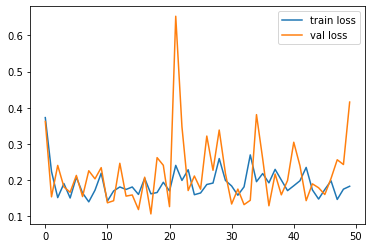

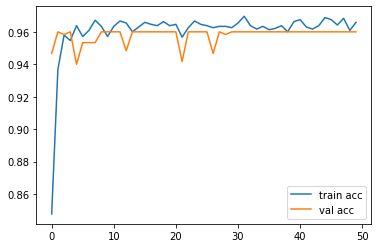

<Figure size 432x288 with 0 Axes>

In [45]:
# plot the loss
plt.plot(vg.history['loss'], label='train loss')
plt.plot(vg.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vg.history['accuracy'], label='train acc')
plt.plot(vg.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Here I select VGG16 as my final model because it have almost equal training and testing accuracy and also loss almost equal

In [46]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model_vg.save('model_vgg.h5')

In [47]:
y_pred = model_vg.predict(test_vg)

y_pred

array([[9.9631989e-01, 5.8817612e-15, 3.6800520e-03],
       [9.9993837e-01, 1.1012993e-18, 6.1659426e-05],
       [4.9628746e-09, 9.9509865e-16, 1.0000000e+00],
       ...,
       [9.3742106e-12, 9.7086096e-17, 1.0000000e+00],
       [1.4214851e-18, 1.0000000e+00, 6.6756511e-10],
       [2.4153492e-22, 1.0000000e+00, 2.3418142e-14]], dtype=float32)

In [48]:
#returns maxcimum value in each row
y_pred = np.argmax(y_pred, axis=1)

y_pred

array([0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2,
       1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2,
       0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0,
       0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0,
       1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2,
       1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 2, 0, 2, 0,
       1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1,